<a href="https://colab.research.google.com/github/manaswinivedula/pythonDeepLearningLab2/blob/master/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import re
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
import matplotlib
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


import matplotlib.pyplot as plt

df_train = pd.read_csv('train.tsv', sep='\t')
df_test = pd.read_csv('test.tsv', sep='\t')

##Data preprocessing
#we make text lower case and leave only letters from a-z and digits
df_train['Phrase'] = df_train['Phrase'].str.lower()
df_train['Phrase'] = df_train['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_test['Phrase'] = df_test['Phrase'].str.lower()
df_test['Phrase'] = df_test['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
X_train = df_train.Phrase
y_train = df_train.Sentiment
max_fatures = 2000
tokenize = Tokenizer(num_words=max_fatures, split=' ')
tokenize.fit_on_texts(X_train.values)
X_test = df_test.Phrase
X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)
max_lenght = max([len(s.split()) for s in df_train['Phrase']])
X_train = pad_sequences(X_train, max_lenght)
X_test = pad_sequences(X_test, max_lenght)
print(X_train.shape)
print(X_test.shape)

##Model building
model=Sequential()
model.add(Embedding(max_fatures, output_dim=100,input_length=48))
model.add(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=3, verbose=True,  batch_size=1024)

(156060, 48)
(66292, 48)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 48, 100)           200000    
_________________________________________________________________
lstm_8 (LSTM)                (None, 48, 128)           117248    
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 505       
Total params: 373,661
Trainable params: 373,661
Non-trainable params: 0
_______________________

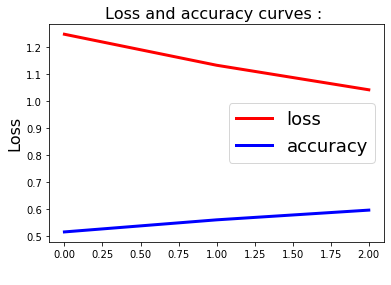

In [36]:
 fig1 = plt.figure()
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['acc'], 'b', linewidth=3.0)
plt.legend(['loss', 'accuracy'], fontsize=18)
plt.xlabel(' ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss and accuracy curves : ', fontsize=16)
fig1.savefig('loss_lstm.png')


